In [43]:
import numpy as np
import matplotlib.pyplot as plt

from LinearRegressionGD import LinearRegressionGD

## 1. Generating the data with noise

In [32]:
def generate_data(nsamples=1000, slope=5, intercept=4, sig=1.5):
    x = np.random.randn(nsamples)
    # Adding sigma variance in the data
    y_true = slope*x + intercept
    y = y_true + (np.random.randn(nsamples))*sig
    return x, y, y_true

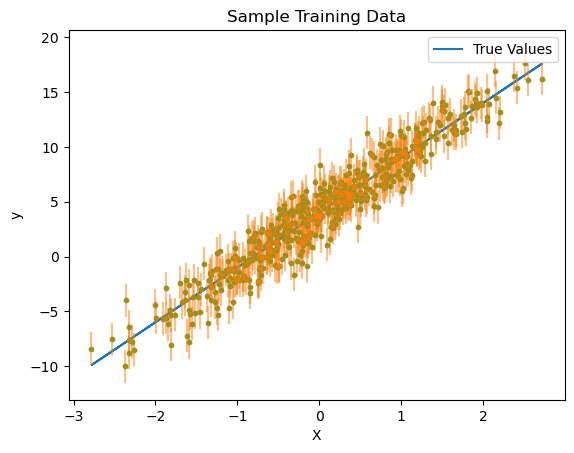

In [46]:
m_true, b_true = 5, 4
sig = 1.5
X, y, y_true = generate_data(500, slope=m_true, intercept=b_true, sig=sig)
plt.plot(X,y_true, label='True Values')
plt.errorbar(X,y,yerr=sig, fmt='.', alpha=0.5)
plt.plot(X,y,'.')
plt.title('Sample Training Data')
plt.xlabel(('X'))
plt.ylabel(('y'))
plt.legend()
plt.show()

In [47]:
X = X[...,np.newaxis]
X.shape, y.shape

((500, 1), (500,))

## 2. Loading the custom Linear Regression Model

In [48]:
# Instantiating model with default parameters
# Learning rate : 10e-3, n_iter = 200
lr_model = LinearRegressionGD()
lr_model.fit(X, y)

In [54]:
# Checking the weights and biases
print(f'm(true, learned): {m_true, lr_model.w_[1]}\nb(true, learned):{b_true, lr_model.w_[0]}')


m(true, learned): (5, 5.049794838655881)
b(true, learned):(4, 3.9856226703617197)


We can see that the model has learned quite well and is very close to the true values

## 3. Evaluating Performance

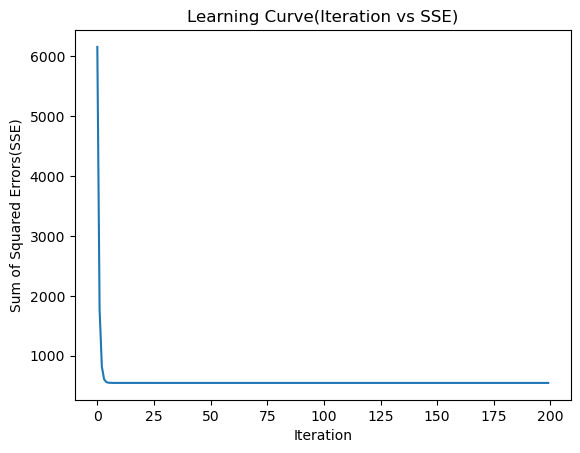

In [61]:
# Plotting the errors vs iteration
plt.plot(range(len(lr_model.cost_)), lr_model.cost_)
plt.title('Learning Curve(Iteration vs SSE)')
plt.xlabel('Iteration')
plt.ylabel('Sum of Squared Errors(SSE)')
plt.show()

We can see that the model learns very soon and remains constant for the rest of the time